In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification

In [8]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

<AxesSubplot:xlabel='0', ylabel='1'>

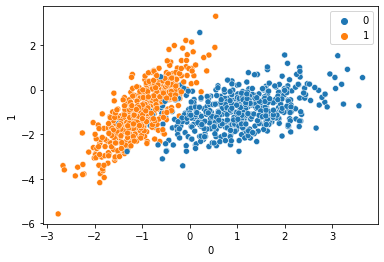

In [15]:
sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [23]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
score = accuracy_score(y_test,y_pred)
print(score)

0.96


In [27]:
confusion_matrix(y_test,y_pred)

array([[139,   7],
       [  5, 149]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.96      0.97      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [43]:
params = {
    'kernel' : ['rbf'],
    'C' : [0.001, 0.1, 1, 10, 100],
    'gamma' : [0.001, 0.1, 1, 10, 100]
}

In [44]:
grid = GridSearchCV(SVC(),param_grid=params, cv= StratifiedKFold())

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.1, 1, 10, 100], 'kernel': ['rbf']})

In [46]:
y_pred = grid.predict(X_test)

In [47]:
score = accuracy_score(y_test,y_pred)
print(score)

0.9633333333333334


In [49]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

### SVR

In [51]:
df = sns.load_dataset('tips')

In [52]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
X = df.drop('tip',axis=1)

In [56]:
y= df['tip']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [69]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [70]:
X_train['sex']= le1.fit_transform(X_train['sex'])
X_train['smoker']= le2.fit_transform(X_train['smoker'])
X_train['time']= le3.fit_transform(X_train['time'])

In [71]:
X_test['sex']= le1.transform(X_test['sex'])
X_test['smoker']= le2.transform(X_test['smoker'])
X_test['time']= le3.transform(X_test['time'])

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [75]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),[3])],remainder='passthrough')

In [79]:
X_train = ct.fit_transform(X_train)

In [81]:
X_test = ct.transform(X_test)

In [82]:
from sklearn.svm import SVR
model = SVR()

In [83]:
model.fit(X_train,y_train)

SVR()

In [85]:
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,y_pred)

0.3521062891112101